In [1]:
!which python

/Users/khalil/miniconda3/envs/bpr/bin/python


In [2]:
%reload_ext autoreload
%autoreload 2
%reload_ext blackcellmagic
%config InlineBackend.figure_format = 'retina'

In [3]:
from pathlib import Path
from scipy import sparse
from scipy.sparse import coo_matrix
import bpr
import math
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import os
import pandas as pd
import random
import seaborn as sns
import math
from bisect import bisect_right
from typing import List, Iterator
import time
# from bpr.optimizers import *
# from bpr.utils import *

In [4]:
seed = 42

os.environ["PYTHONHASHSEED"] = str(seed)
np.random.seed(seed)
random.seed(seed)

In [5]:
%%time

# Load data
ratings_df = bpr.load_ml100k()
# ratings_df = bpr.load_ml1m()
train_df, test_df = bpr.get_negative_samples(ratings_df, use_numpy=False)

CPU times: user 15.5 s, sys: 376 ms, total: 15.8 s
Wall time: 15.8 s


dict_keys(['OnlineBatchSampler', 'RecencyBiasSampler', 'RandomSampler'])
Training RandomSampler
Epoch   1
Epoch   2
Epoch   3
Epoch   4
Training RandomSampler finished in 2825.5108036994934


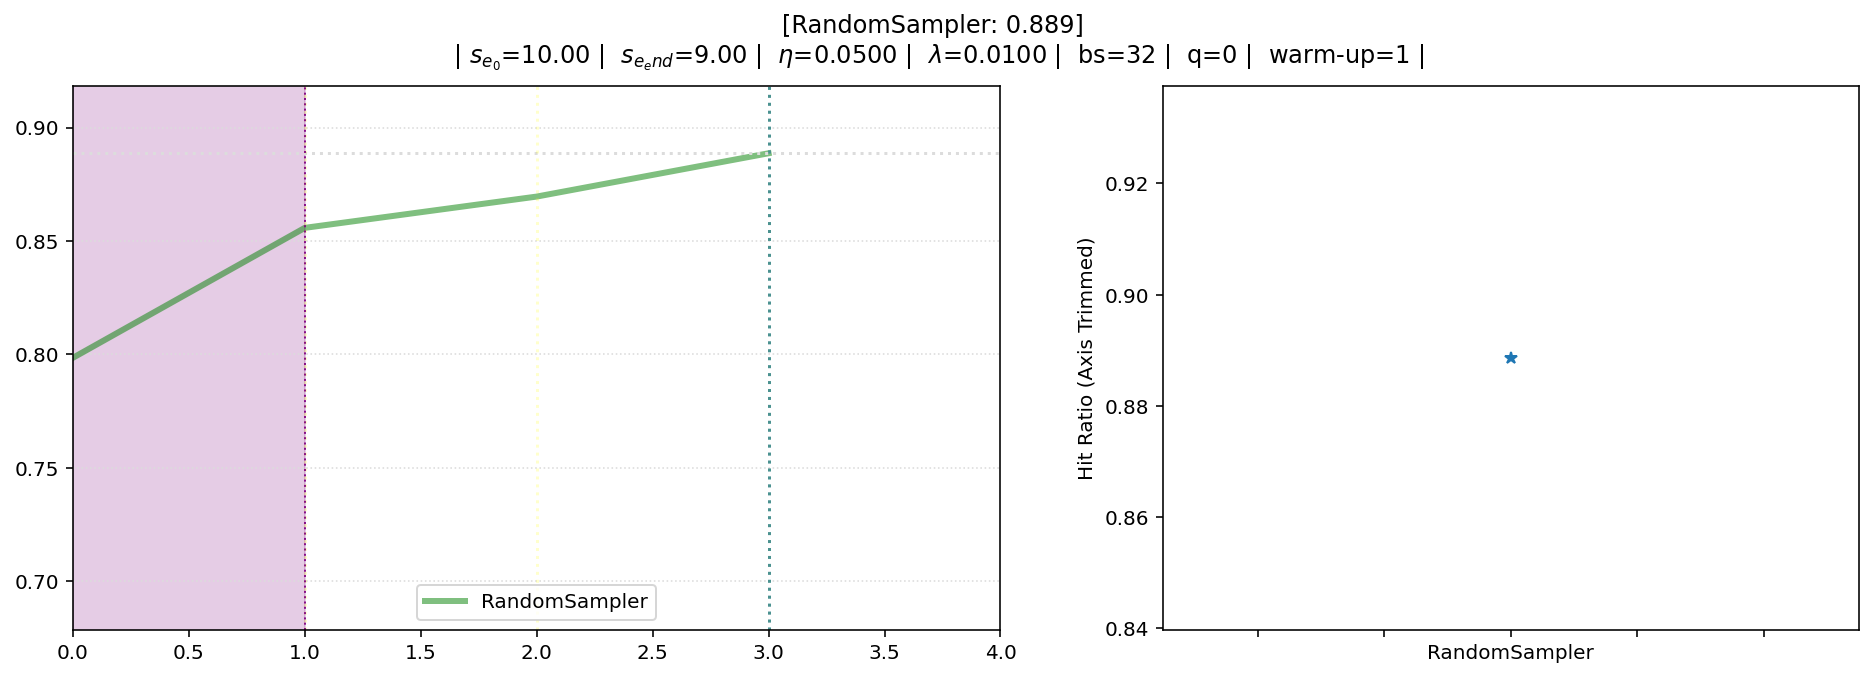

In [6]:
learning_rate = 0.05 # 0.05
regularization = 0.01
batch_size = int(0.3 * train_df.shape[0])
batch_size = 64 # int(0.3 * train_df.shape[0])
iterations=4
warm_up = int(0.3*iterations)
window_size = int(0.8*warm_up)
q = window_size
se_0 = 10
se_end = 9


def create_optimizers():
    def _g(sampler):
        return bpr.MiniBatchGD(
            train_df=train_df,
            test_df=test_df,
            batch_size=batch_size,
            learning_rate=learning_rate,
            regularization=regularization,
            sampler=sampler,
            batch_update=True
        )

    optimizers = {
#         "OnlineBatchSampler": _g(
#             bpr.OnlineSampler(
#                 train_df=train_df,
#                 batch_size=batch_size,
#                 warm_up=warm_up,
#                 epochs=iterations,
#                 se_0=se_0,
#                 se_end=se_end,
#                 reverse=True,
#             )
#         ),
#         "RecencyBiasSampler": _g(
#             bpr.CarpeDiemEx(
#                 train_df=train_df,
#                 batch_size=batch_size,
#                 warm_up=warm_up,
#                 epochs=iterations,
#                 se_0=se_0,
#                 se_end=se_end,
#                 q=q,
#                 reverse=True,
#             )
#         ),
        "RandomSampler": _g(
            bpr.RandomSampler(train_df=train_df, batch_size=batch_size, replace=False)
        ),
    }
    return optimizers


colors = {
    "OnlineBatchSampler": "red",
    "RecencyBiasSampler": "blue",
    "RandomSampler": "green",
}
print(colors.keys())


optimizers = create_optimizers()
histories = bpr.run_experiments(
    iterations=iterations,
    optimisers=optimizers,
    sequence=list(optimizers.keys())
)

bpr.plot_histories(
    histories_dict=histories,
    warm_up=warm_up,
    colors=colors,
    se_0=se_0, 
    se_end=se_end,
    learning_rate=learning_rate,
    regularization=regularization,
    batch_size=32,
    window_size=window_size,
    # trim=True
)

In [7]:
assert False

AssertionError: 

In [8]:
learning_rate = 0.05 # 0.05
regularization = 0.01 #0.01
batch_size = int(0.15 * train_df.shape[0])
iterations=40
warm_up = int(0.3*iterations)
window_size = 1
q = window_size
se_0 = 10
se_end = 9

for q in [2, 3, 4]:
    batch_size = int(bs * train_df.shape[0])
    optimizers = create_optimizers()
    histories = bpr.run_experiments(
        iterations=iterations,
        optimisers=optimizers,
        sequence=list(optimizers.keys())
    )

    bpr.plot_histories(
        histories_dict=histories,
        warm_up=warm_up,
        colors=colors,
        se_0=se_0, 
        se_end=se_end,
        learning_rate=learning_rate,
        regularization=regularization,
        batch_size=batch_size,
        window_size=q,
        # trim=True
    )

NameError: name 'bs' is not defined

In [9]:
learning_rate = 0.01 # 0.05
regularization = 0.01 #0.01
batch_size = int(0.3 * train_df.shape[0])
iterations=40
warm_up = int(0.3*iterations)
window_size = 3
q = window_size
se_0 = 10
se_end = 9

for se_0 in [10, 100, 1000]:
    for se_end in [1, 10, 100, 1000]:
        batch_size = int(bs * train_df.shape[0])
        optimizers = create_optimizers()
        histories = bpr.run_experiments(
            iterations=iterations,
            optimisers=optimizers,
            sequence=list(optimizers.keys())
        )

        bpr.plot_histories(
            histories_dict=histories,
            warm_up=warm_up,
            colors=colors,
            se_0=se_0, 
            se_end=se_end,
            learning_rate=learning_rate,
            regularization=regularization,
            batch_size=batch_size,
            window_size=window_size,
            # trim=True
        )

NameError: name 'bs' is not defined

In [10]:
assert False

AssertionError: 